# **PART C QUESTIONS**

**QUESTION 1 OF PART C**

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [60]:
# Website URL
url = "https://wheeloffortuneanswer.com/"

In [61]:
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Find the table containing puzzle data
    table = soup.find("table")  # Adjust selector based on page structure
    rows = table.find_all("tr")[1:]  # Skipping header row

In [62]:
    data = []
    for row in rows:
        columns = row.find_all("td")
        category = columns[0].text.strip()
        word_to_guess = columns[1].text.strip()
        data.append([category, word_to_guess])

In [63]:
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=["Category", "Word To Guess"])
    # Save to CSV
    df.to_csv("Olato_B30927.csv", index=False)
    print("Data saved successfully as Olax.csv")


Data saved successfully as Olax.csv


**QUESTION 2 OF PART C**

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [65]:
# Load the dataset
df = pd.read_csv("Olato_B30927.csv")

In [66]:
# Combine all words into a single text
text = " ".join(df["Word To Guess"].astype(str))

In [67]:
# Generate WordCloud
wordcloud = WordCloud(width=500, height=250, background_color="black").generate(text)

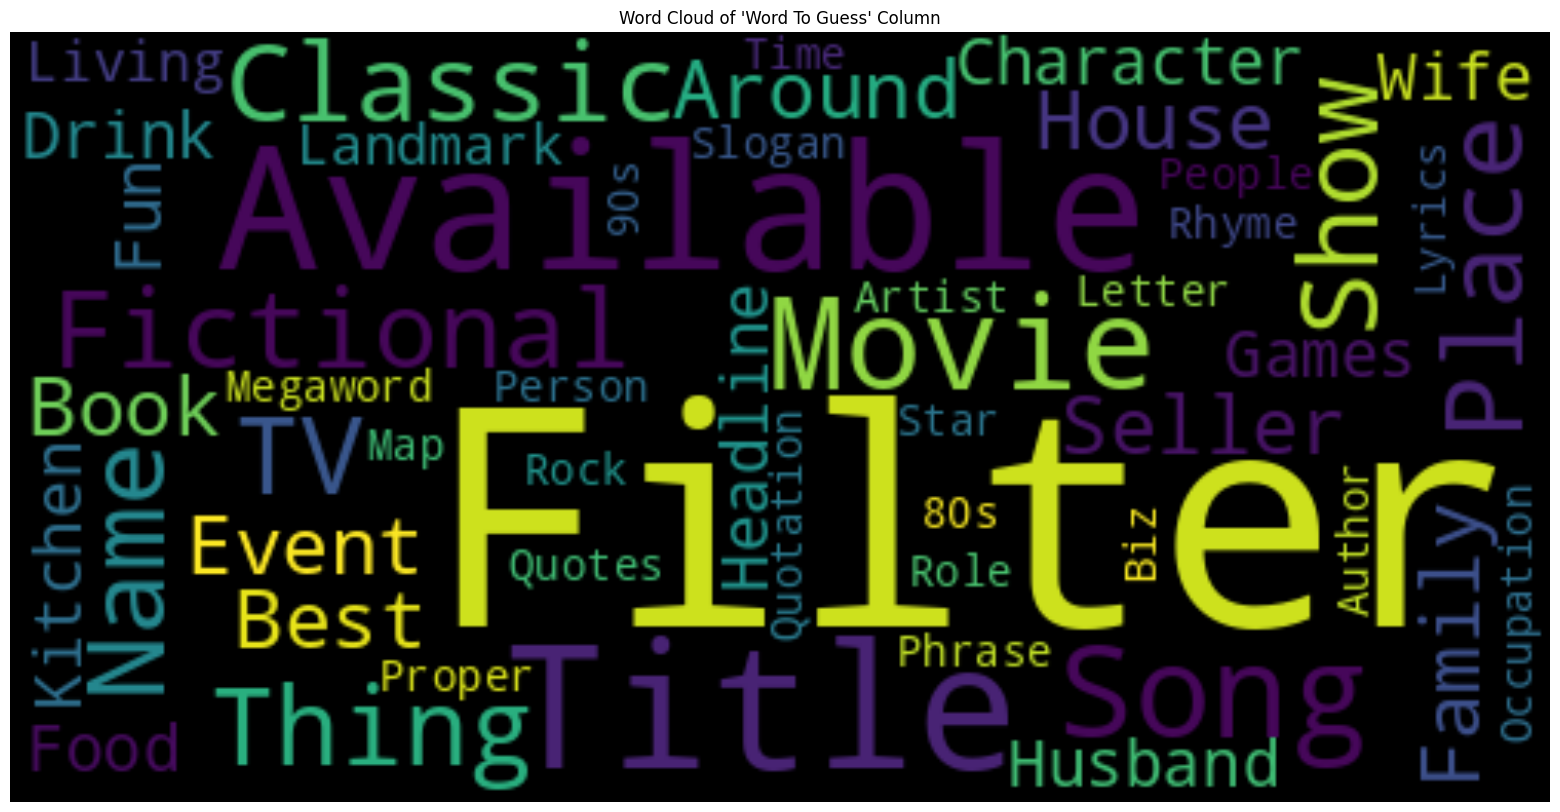

In [ ]:
# Plot the WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of 'Word To Guess' Column")
plt.show()

**QUESTION 3 OF PART C**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/European news.csv")

In [36]:
# Check column names
print(df.head())

                                            Articles         labels
0  Musicians to tackle US red tape  Musicians gro...  entertainment
1  U2s desire to be number one  U2, who have won ...  entertainment
2  Rocker Doherty in on-stage fight  Rock singer ...  entertainment
3  Snicket tops US box office chart  The film ada...  entertainment
4  Oceans Twelve raids box office  Oceans Twelve,...  entertainment


<ipython-input-58-700f89e5c969>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


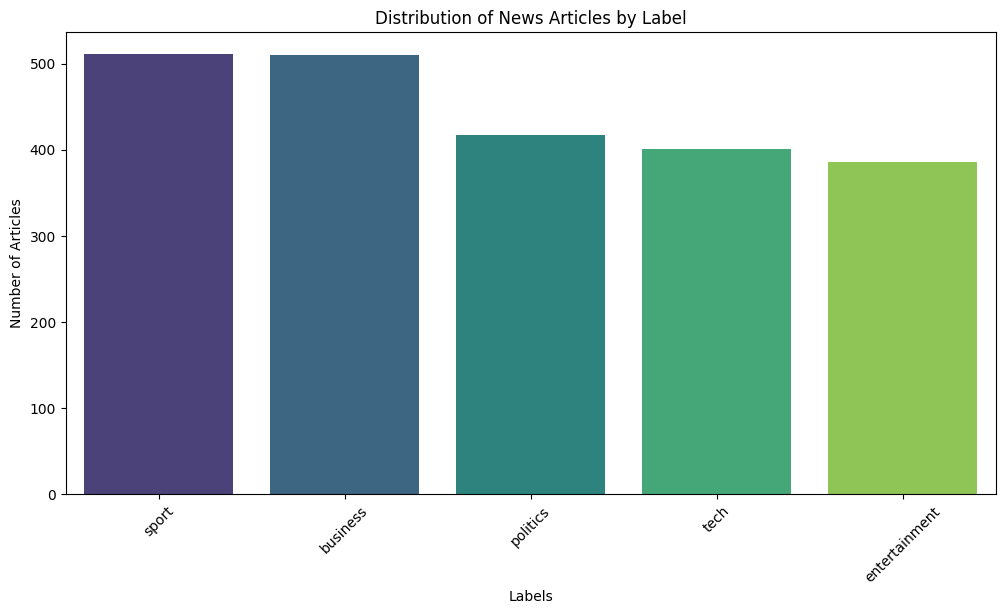

In [58]:
# Visual 1: Label Distribution (Bar Chart)
plt.figure(figsize=(12, 6))
label_counts = df['labels'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribution of News Articles by Label')
plt.xlabel('Labels')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Word Cloud: Most common words in articles
text = " ".join(df["Articles"].dropna())  # Combine all articles into one text block
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

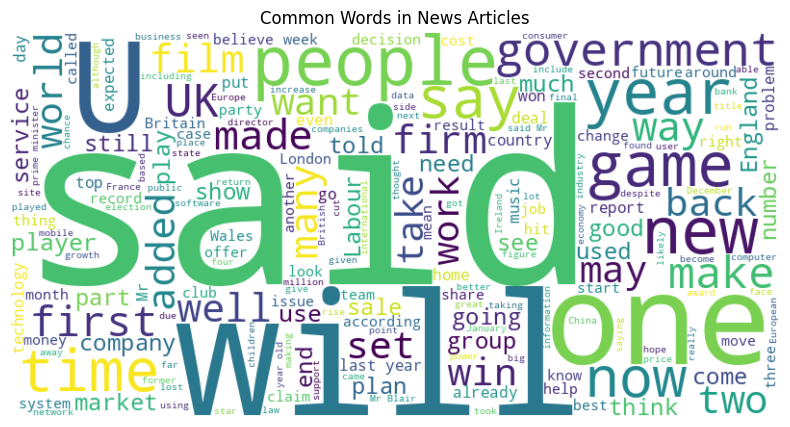

In [45]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in News Articles")
plt.show()


**QUESTION 4 OF PART C**

In [46]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [47]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/European news.csv")

In [48]:
# Text Preprocessing Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

In [50]:
# Apply preprocessing
df["Processed_Content"] = df["Articles"].dropna().apply(clean_text)

In [53]:
# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df["Processed_Content"], df["labels"], test_size=0.2, random_state=42)

In [54]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [55]:
# Train the model using Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [56]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [57]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.98
               precision    recall  f1-score   support

     business       0.97      0.98      0.98       103
entertainment       1.00      0.96      0.98        84
     politics       0.94      0.99      0.96        80
        sport       1.00      0.99      0.99        98
         tech       1.00      0.99      0.99        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

